In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainingcsv/training.csv


In [1]:
# AdaBoost
#    Bagging
#    JRip
#    Naïve Bayes
# REPTree
#    JRip
#    Naïve Bayes
#    REPTree
# Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score
from sklearn.utils import shuffle

# Load the dataset
df = pd.read_csv('/kaggle/input/trainingcsv/training.csv')

# Shuffle the dataset
df = shuffle(df)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

# Define the clean_dataset function
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.fillna(0, inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

# Clean the dataset and prepare features (X) and labels (y)
X = clean_dataset(df[df.columns[5:-1]])
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

/tmp/ipykernel_31/2601058634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)
/tmp/ipykernel_31/2601058634.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [4]:
# Define a function to evaluate and visualize the performance of a classifier
def evaluate_classifier(clf, name):
    # Fit the classifier using the training data
    clf.fit(X_train, y_train)
    # Get predicted labels
    y_pred = clf.predict(X_test)
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    # Plot Receiver Operating Characteristic (ROC) curve
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) for {name}')
    plt.legend(loc="lower right")
    plt.show()
    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='navy', lw=2, label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower left")
    plt.show()


Accuracy for AdaBoost: 0.99
Confusion Matrix for AdaBoost:
[[ 267916    5914]
 [   9702 1218987]]


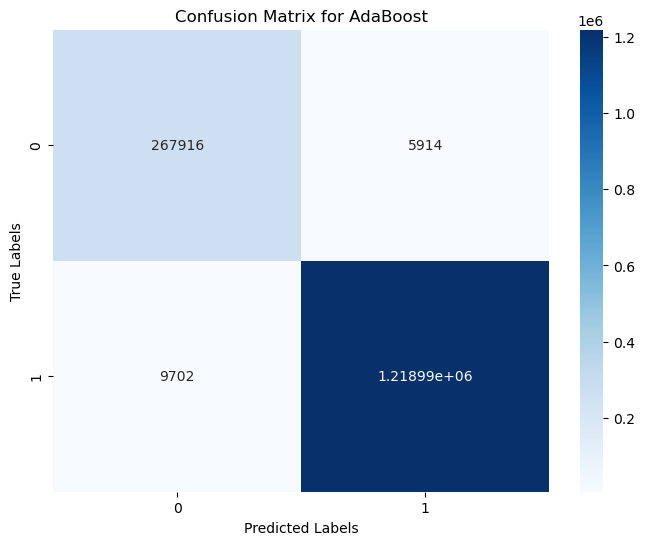

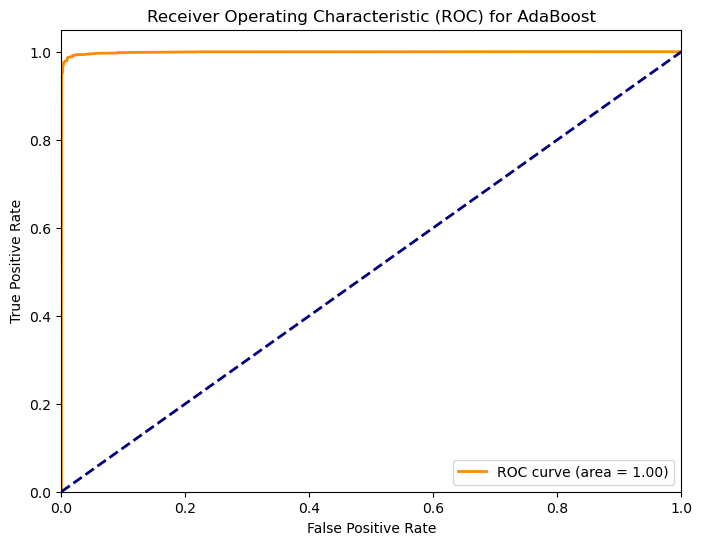

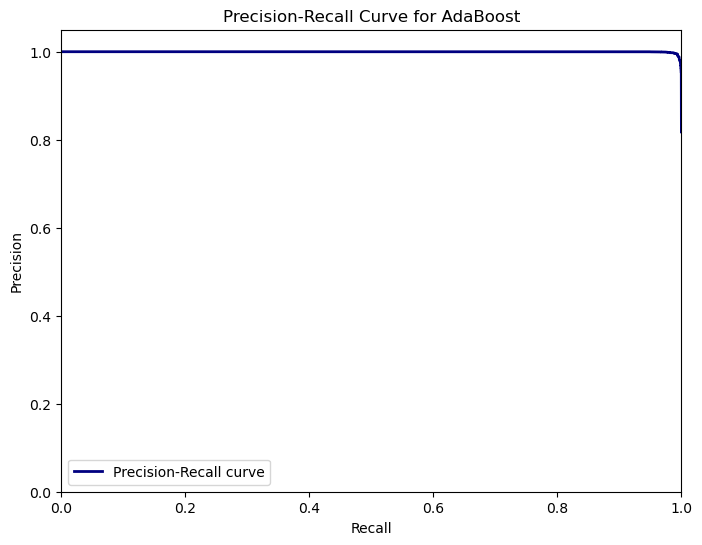

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Initialize and evaluate multiple classifiers
classifiers = [
    AdaBoostClassifier(n_estimators=50, random_state=1),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=1),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=50, random_state=1)
]

classifier_names = [
    "AdaBoost",
    "Bagging",
    "Decision Tree",
    "Naïve Bayes",
    "Random Forest"
]

for clf, name in zip(classifiers, classifier_names):
    evaluate_classifier(clf, name)
